In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv("Test.csv")

In [3]:
# Step 1: Feature Selection
features = ['Age', 'Work_Experience', 'Family_Size']
df_model = df[features].copy()

# Handle missing values (fill with mean)
df_model.fillna(df_model.mean(), inplace=True)

In [5]:
# Step 2: Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_model)

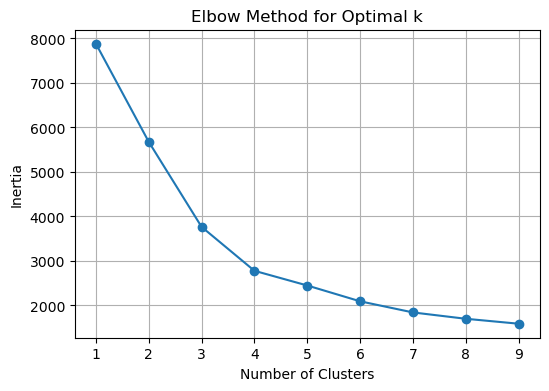

In [7]:
# Step 3: Elbow Method to determine optimal k
inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [9]:
# Step 4: Apply KMeans (assume k=4 for now)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

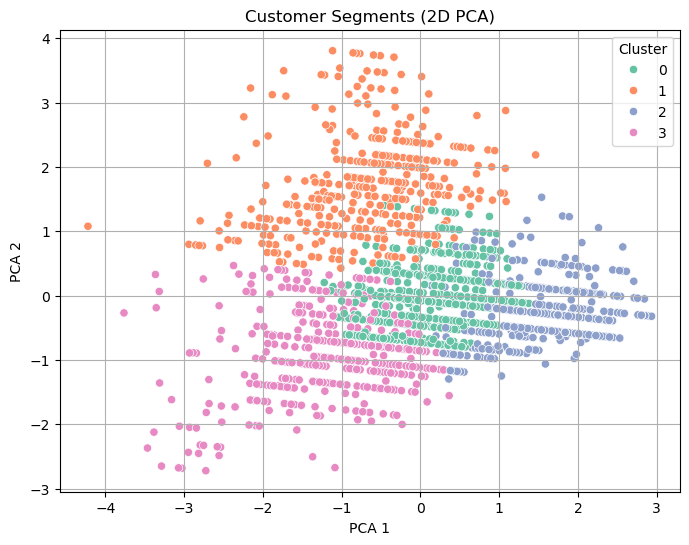

In [11]:
# Step 5: 2D Visualization using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Cluster'], palette='Set2')
plt.title("Customer Segments (2D PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()